In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving Dataset.csv to Dataset.csv


In [3]:
columns_to_drop = ['id']
if 'Unnamed: 32' in df.columns:
    columns_to_drop.append('Unnamed: 32')

df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')
df_cleaned['diagnosis'] = df_cleaned['diagnosis'].map({'M': 1, 'B': 0})
df_cleaned.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training: {X_train.shape[0]} | Testing: {X_test.shape[0]}")


Training: 455 | Testing: 114


In [6]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_normalized)

cross_tab = pd.crosstab(df_cleaned['diagnosis'], cluster_labels)
purity = (cross_tab[0].max() + cross_tab[1].max()) / len(df_cleaned)

print(f"\nK-Means Cluster Purity: {purity:.4f} ({purity*100:.2f}%)")
print("\nCross-tabulation:")
print(cross_tab)


K-Means Cluster Purity: 0.9279 (92.79%)

Cross-tabulation:
col_0        0    1
diagnosis          
0            9  348
1          180   32


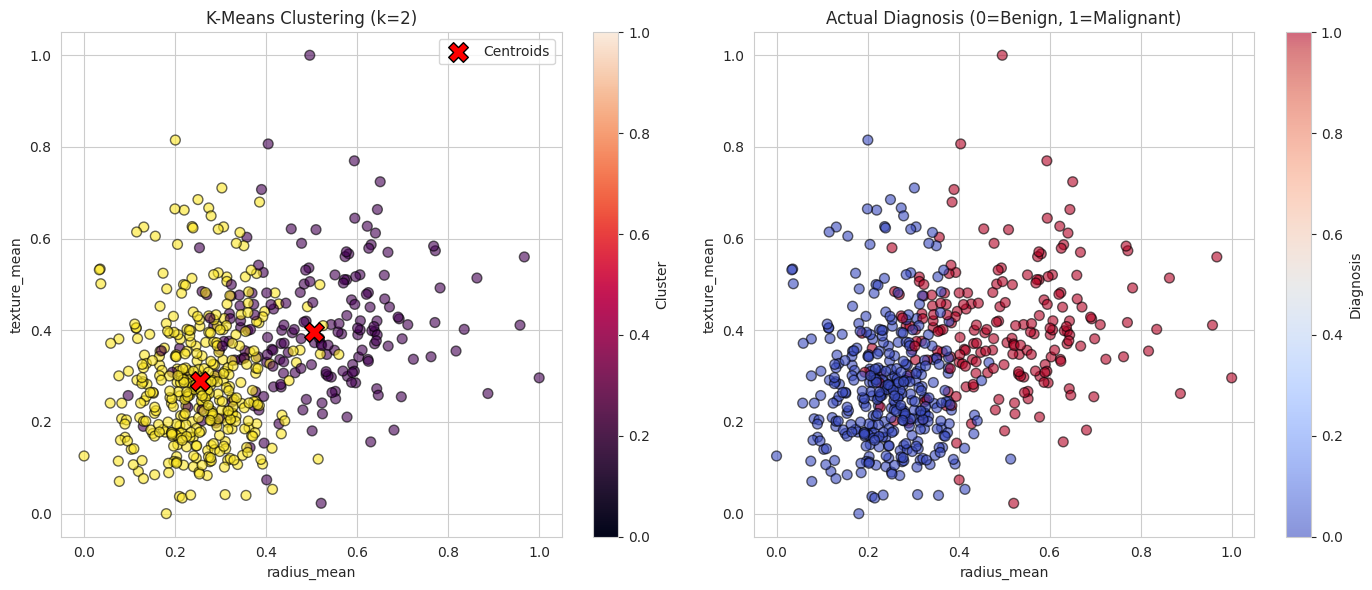

In [7]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_normalized.iloc[:, 0], X_normalized.iloc[:, 1],
           c=cluster_labels, cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='X', s=200, edgecolors='black', label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-Means Clustering (k=2)')
plt.legend()
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(X_normalized.iloc[:, 0], X_normalized.iloc[:, 1],
           c=df_cleaned['diagnosis'], cmap='coolwarm', alpha=0.6, edgecolors='k', s=50)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Actual Diagnosis (0=Benign, 1=Malignant)')
plt.colorbar(label='Diagnosis')

plt.tight_layout()
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n{'='*50}")
print("KNN CLASSIFIER PERFORMANCE (k=5)")
print(f"{'='*50}")
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

print(f"\n{classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])}")



KNN CLASSIFIER PERFORMANCE (k=5)
Accuracy:  0.9649 (96.49%)
Precision: 1.0000 (100.00%)
Recall:    0.9048 (90.48%)
F1-Score:  0.9500 (95.00%)

              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



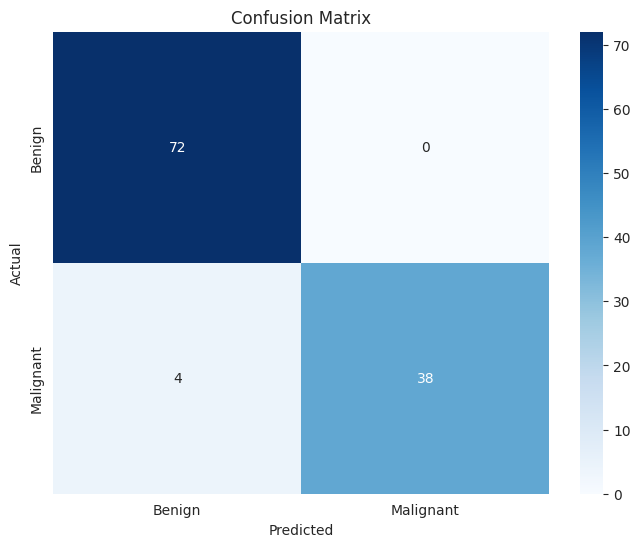

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Optimal k: 5 | Accuracy: 0.9649 (96.49%)


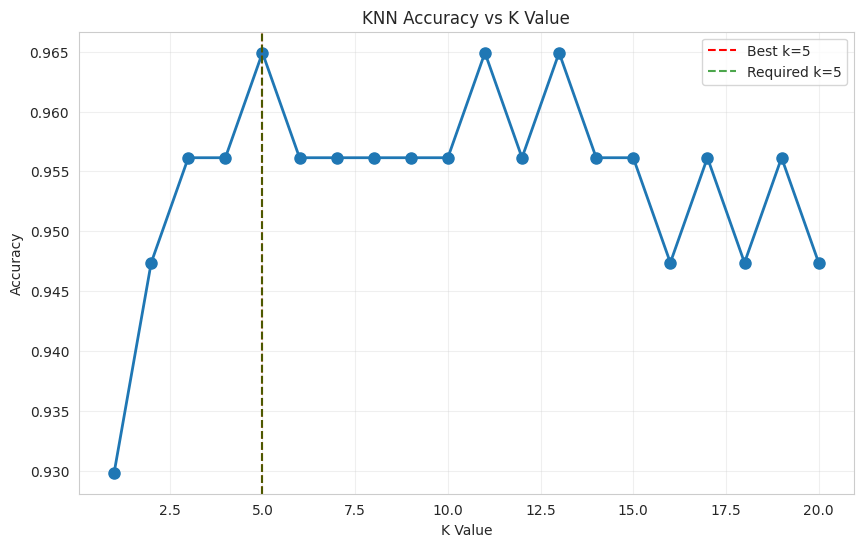

In [11]:
k_values = range(1, 21)
accuracies = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test))
              for k in k_values]

best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"\nOptimal k: {best_k} | Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.axvline(x=5, color='g', linestyle='--', label='Required k=5', alpha=0.7)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
print(f"\n{'='*50}")
print("SUMMARY")
print(f"{'='*50}")
print(f"Dataset: {len(df_cleaned)} samples | {X.shape[1]} features")
print(f"Benign: {(y==0).sum()}          | Malignant: {(y==1).sum()}")
print(f"K-Means Purity: {purity:.4f}")
print(f"KNN Accuracy (k=5): {accuracy:.4f}")
print(f"Best k: {best_k}            | Best Accuracy: {best_accuracy:.4f}")
print(f"{'='*50}")


SUMMARY
Dataset: 569 samples | 30 features
Benign: 357          | Malignant: 212
K-Means Purity: 0.9279
KNN Accuracy (k=5): 0.9649
Best k: 5            | Best Accuracy: 0.9649
